<a href="https://colab.research.google.com/github/elliewalters-oss/Data-Science/blob/main/Mock_Datathon_with_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mock Datathon


**Rules**

- You have 1h15min to complete the datathon (those who are granted extra time should adjust their time according to their allowance)
- Submit your jupyter notebook in google classroom in the assignment created under material.
- The notebook needs to run and be reproducible.
- R or Python allowed.
- You are allowed to surf the web to search for functions or help you may need in the assignment. E.g., you may need a function that has not been discussed in class and you can search for it and go through the help file to understand how to use it
- **You are allowed to use only the techniques seen in class** You are free to use other implementation, but the algorithms, loss functions, and evaluation criteria should be the ones included in the notebook up to random forest included
- **Comment** on the steps/choices you make: justify the techniques/data science strategy used, why the were chosen and implemented in a certain way.
- **Comment** on the output of each procedure: do not just run the code. Explain the output and use it to answer the questions.
- **Make deliberate choices.** Do not simply include numerous plots or techniques. Present only the results that are meaningful and contribute to answering the question.




*Note*: I am providing here a sketch of a possible solution. A complete solution would likely need to be more detailed and thoroughly developed.

# Baseball data

Finally a [Baseball dataset](https://raw.githubusercontent.com/barcelonagse-datascience/academic_files/master/data/Baseball.csv). You are in the data science team of a Baseball team. You have the following dataset that contain the following variables


- `Hits` :Number of hits in 2023
- `HmRun`: Number of home runs in 2023
- `Runs`: Number of runs in 2023
- `Years`: Number of years in the major leagues
- `CHits`: Number of hits during his career
- `CHmRun`: Number of home runs during his career
- `CRuns`: Number of runs during his career
- `League`: A factor with levels A and N indicating player's league at the end of 2023
- `PutOuts`: Number of put outs in 2023
- `Salary`: 2024 annual salary on opening day in thousands of dollars


Your task is to determine how much you want to pay someone. I.e., you are interested in predicting `salary`

In [ ]:
data <- read.csv('https://raw.githubusercontent.com/barcelonagse-datascience/academic_files/master/data/Baseball.csv')
head(data)

,X,Hits,HmRun,Runs,Years,CHits,CHmRun,CRuns,League,PutOuts,Salary
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>
1,-Andy Allanson,66,46,30,1,66,6,30,A,NA,NA
2,-Alan Ashby,81,9,24,14,835,55,321,N,NA,475.0
3,-Alvin Davis,130,100,66,3,457,48,224,A,270,480.0
4,-Andre Dawson,141,53,65,11,1575,24,828,N,111,500.0
5,-Andres Galarraga,87,27,39,2,101,116,48,N,NA,91.5
6,-Alfredo Griffin,169,215,74,11,1133,32,501,A,121,750.0


In [ ]:
dim(data)
n <- dim(data)[1]
p <- dim(data)[2]

[1] 315  11

Before even starting, it is important to have an overall sense of the data set!
So compute correlation, basic plots, etc.

## Question 1

Develop a strategy to deal with missing data and outliers. This includes

(i) doing the exploratory steps that will help you with the analysis

(ii) commenting on what you done

 (iii) commenting on the choices you have done.


In [ ]:
library(dplyr)
#check missing data first
colSums(is.na(data))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




X    Hits   HmRun    Runs   Years   CHits  CHmRun   CRuns  League PutOuts 
      0       0       0       0       0       0       0       0       0      63 
 Salary 
     55

In [ ]:
#Salary has to be removed, it is the dependent variable, we cannot have missingness there. I will remove the rows
data <- data[is.na(data$Salary)==FALSE,]

In [ ]:
#Now PutsOuts
cor(data$PutOuts,data$Salary,use = "complete.obs")


[1] 0.01533501

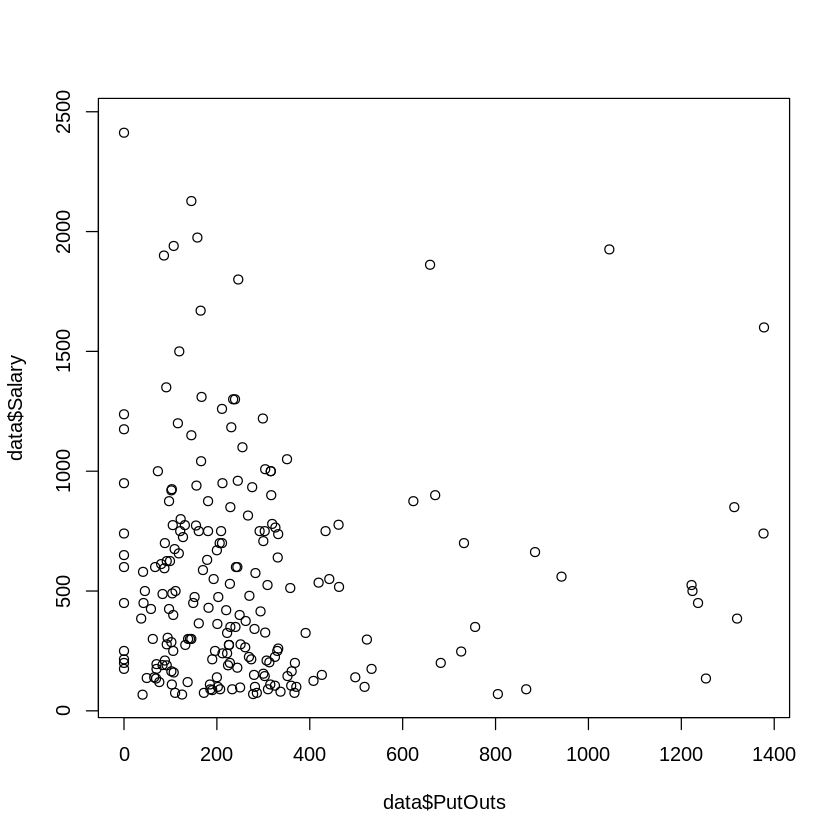

In [ ]:
#at the end, correlation is just a measure of linear dependence though. Let's look at a 2d plot.
plot(data$PutOuts,data$Salary)

Not easy to understand if there is a an obvious assocation between the two

In [ ]:
#It has no correlation with salary, which is my target variable, the assocition from the plot is not trivial to understand.
# We decide to drop it.
data <- data %>% select(-PutOuts)

In [ ]:
#Sanity check that everything has worked
colSums(is.na(data))

X   Hits  HmRun   Runs  Years  CHits CHmRun  CRuns League Salary 
     0      0      0      0      0      0      0      0      0      0

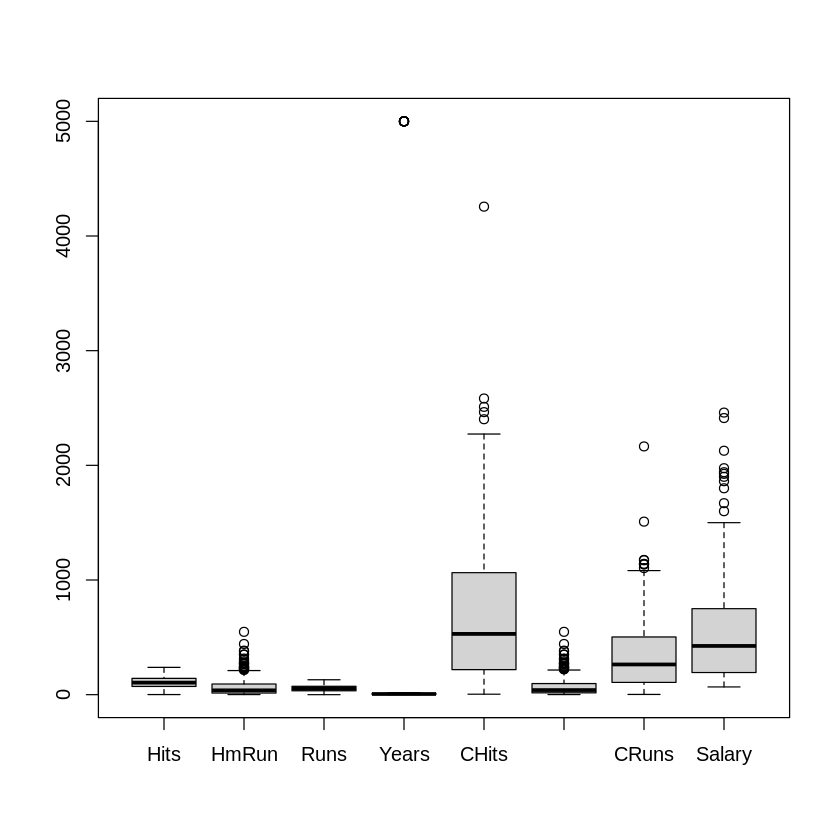

In [ ]:
#Plot and summary to have a sense of potential outlier
boxplot(data[, sapply(data, is.numeric)])

In [ ]:
summary(data)

      X                  Hits           HmRun             Runs       
 Length:260         Min.   :  1.0   Min.   :  1.00   Min.   :  0.00  
 Class :character   1st Qu.: 72.5   1st Qu.: 14.00   1st Qu.: 34.00  
 Mode  :character   Median :105.0   Median : 38.00   Median : 53.00  
                    Mean   :108.3   Mean   : 72.16   Mean   : 55.04  
                    3rd Qu.:142.0   3rd Qu.: 93.00   3rd Qu.: 73.00  
                    Max.   :238.0   Max.   :548.00   Max.   :130.00  
     Years             CHits            CHmRun           CRuns       
 Min.   :   1.00   Min.   :   4.0   Min.   :  1.00   Min.   :   2.0  
 1st Qu.:   4.00   1st Qu.: 218.8   1st Qu.: 16.00   1st Qu.: 107.5  
 Median :   6.00   Median : 530.0   Median : 40.00   Median : 263.5  
 Mean   : 179.77   Mean   : 729.5   Mean   : 74.12   Mean   : 365.0  
 3rd Qu.:  10.25   3rd Qu.:1063.0   3rd Qu.: 97.00   3rd Qu.: 502.0  
 Max.   :5000.00   Max.   :4256.0   Max.   :548.00   Max.   :2165.0  
    League          

In [ ]:
#it makes no sense that Years has a maximum at 5000. It must be some mistake.
#My strategy is to remove those observations since they contain suspicious entries
data <- data[data$Years <1000,]


In [ ]:
#I look at a few extreme points
data[which.max(data$Salary),]

,X,Hits,HmRun,Runs,Years,CHits,CHmRun,CRuns,League,Salary
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
99,-Eddie Murray,151,28,61,10,1679,9,884,A,2460


Eddie Murray has the highest salary. But it looks to me that it has a performance on many metrics that is way above average.

For the remaining variables, I also looked at individual plot (I did not added them for parsimony). There are indeed some extreme observations. However, it is part of competitive sports of having some extreme performance. We decide not to do anything further. Although, a further look at the data is required.

In [ ]:
dim(data)
data <- data[,-1]

[1] 251  10

## Question 2


The head of your team points our that there are several features that are somewhat repeated (they measure a similar concept in different ways) and ask you to find a way to reduce the number of features

- You see that there are several variables that are connected, since they measure the same things at different "scale", for example referring the performance of last year and the career. An idea is to combine them into one.
- In addition, your boss think that `Years` and `League` are not valuable variables. He asks you to create a new variable that interacts the levels of seniority with league. You can decide what `level of seniority` means but definitely it must have a small number of categories (like 2 or 3)

Create a new dataset including the new features and get rid of the ones that you have used to create the new features.

In [ ]:
#First part, I see that Hits-CHits, HmRun-CmRun, and Runs-CRuns are paired.
# I can create new variable that tells me ratio of last year wrt to the career performance
Runs_ratio = data$Runs/data$CRuns
HmRun_ratio = data$HmRun/data$CHmRun
Hits_ratio = data$Hits/data$CHits

In [ ]:
#Now, I am gonna create a new variable seniority_league
#I create two levels of seniority: Junior, and Senior
median(data$Years)
unique(data$League)

[1] 6

[1] "N" "A"

In [ ]:
n <- dim(data)[1]
seniority_league <- rep(0,n)
for (i in 1:dim(data)[1]){
  if (data$Years[i]<= 6){
    if (data$League[i]=="A"){
    seniority_league[i] <- "Junior-A"
  } else {
    seniority_league[i] <- "Junior-N"
  }
  } else {
  if (data$League[i]=="A"){
    seniority_league[i] <- "Senior-A"
  } else {
    seniority_league[i] <- "Senior-N"
  }
}
}


In [ ]:
table(seniority_league)

seniority_league
Junior-A Junior-N Senior-A Senior-N 
      77       64       56       54 

This variable is fairly well balanced.

In [ ]:
new_data <- cbind(data %>% select(Salary),seniority_league,Runs_ratio,HmRun_ratio,Hits_ratio)
head(new_data)

,Salary,seniority_league,Runs_ratio,HmRun_ratio,Hits_ratio
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2,475.0,Senior-N,0.07476636,0.1636364,0.09700599
3,480.0,Junior-A,0.29464286,2.0833333,0.28446389
4,500.0,Senior-N,0.07850242,2.2083333,0.08952381
5,91.5,Junior-N,0.81250000,0.2327586,0.86138614
6,750.0,Senior-A,0.14770459,6.7187500,0.14916152
7,70.0,Junior-N,0.76666667,0.7894737,0.88095238


We modified the data. Again, I want to have a basic look at my dataset, so I am better prepared for further steps in the analysis.  

In [ ]:
summary(new_data)
which(new_data$HmRun_ratio==Inf)


     Salary       seniority_league     Runs_ratio      HmRun_ratio       
 Min.   :  67.5   Length:251         Min.   :0.0000   Min.   :4.464e-03  
 1st Qu.: 190.0   Class :character   1st Qu.:0.1164   1st Qu.:2.529e-01  
 Median : 425.0   Mode  :character   Median :0.2257   Median :1.000e+00  
 Mean   : 538.7                      Mean   :0.3264   Mean   :5.908e+00  
 3rd Qu.: 750.0                      3rd Qu.:0.4593   3rd Qu.:3.365e+00  
 Max.   :2460.0                      Max.   :1.0000   Max.   :2.470e+02  
   Hits_ratio     
 Min.   :0.02693  
 1st Qu.:0.11706  
 Median :0.21166  
 Mean   :0.32692  
 3rd Qu.:0.44161  
 Max.   :1.00000  

integer(0)

In [ ]:
new_data %>% select(-seniority_league) %>% cor(use = "complete.obs")

,Salary,Runs_ratio,HmRun_ratio,Hits_ratio
Salary,1.0000000,-0.5302683,-0.1059779,-0.5257710
Runs_ratio,-0.5302683,1.0000000,0.1904935,0.9932699
HmRun_ratio,-0.1059779,0.1904935,1.0000000,0.1881491
Hits_ratio,-0.5257710,0.9932699,0.1881491,1.0000000


## Question 3
**Note**: here and in Q4 you will run a few algorithms and  you are asked to compare them (check also question below). So make sure you get the data ready to have a "fair comparison".

In this Question, use the new dataset you just created in Q2.

- Use a linear regression model to predict `salary`. Choose a way of doing it that includes all the covariates and such that the coefficients are unbiased.

- Evaluate its performance as a predictor using an appropriate strategy and evaluation criteria (you can use more than one).

- Compare the predictive performance of the linear regression with a nonlinear method of your choice (don't worry about optimizing it!)



In [ ]:
#the sample size is not too large to do a three way split. I will do a two-way one.
#Possibly using cv if I need to choose parameters
#I will not have time and space to reproduce the analysis for multiple splits. However, all my outcomes depends on this given split
#For a serious analysis, it will be essentially to check the robustness (especially in light of the sample size, which is fairly small!)
id_train <- sample(n,floor(0.7*n) ,replace=FALSE)
id_test <- setdiff(seq(1,n),id_train)
data_train <- new_data[id_train,]
data_test <- new_data[id_test,]

In [ ]:
#I need to run a linear model
linear <- lm(Salary ~ ., data=data_train)
summary(linear)
#compute MSE
y_pred <- predict(linear, data=data_test)
MSE <- mean((y_pred-data_test$Salary)^2)
 MSE
#clearly horrible performance!


Call:
lm(formula = Salary ~ ., data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-627.56 -254.68  -61.13  134.48 1478.56 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                740.1360    80.4785   9.197   <2e-16 ***
seniority_leagueJunior-N   -39.3680    79.1505  -0.497    0.620    
seniority_leagueSenior-A   118.9386    92.0711   1.292    0.198    
seniority_leagueSenior-N    83.1366    94.5228   0.880    0.380    
Runs_ratio               -1508.2755   986.5255  -1.529    0.128    
HmRun_ratio                 -0.1681     1.4567  -0.115    0.908    
Hits_ratio                 811.7934   987.2092   0.822    0.412    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 386.6 on 168 degrees of freedom
Multiple R-squared:  0.2782,	Adjusted R-squared:  0.2525 
F-statistic: 10.79 on 6 and 168 DF,  p-value: 3.833e-10


Warning message in y_pred - data_test$Salary:
“longer object length is not a multiple of shorter object length”


[1] 301470

In [ ]:
colnames(data_train)

[1] "Salary"           "seniority_league" "Runs_ratio"       "HmRun_ratio"     
[5] "Hits_ratio"

In [ ]:
head(data_train)

,Salary,seniority_league,Runs_ratio,HmRun_ratio,Hits_ratio
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
289,920.000,Junior-N,1.00000000,0.33333333,1.00000000
114,900.000,Junior-A,0.25207756,2.15584416,0.23489011
212,175.000,Junior-A,0.47333333,0.14383562,0.46332046
282,326.667,Senior-N,0.23188406,1.13333333,0.20892495
312,875.000,Senior-A,0.08472687,1.56250000,0.09000662
146,775.000,Junior-A,0.24242424,0.06779661,0.25594406


In [ ]:
#I choose KNN. I may want to do something about the categorical predictor (recall that I need to compute the distance between obs)
#However, here, I simply decide to drop it.

In [ ]:

if (!require(FNN)){ install.packages('FNN') }
library(FNN)
knn <- knn.reg(data_train[,-c(1,2)],  y=data_train[,1],test=data_test[,-c(1,2)], k = 4)
MSE_knn <- mean((data_test[,1]-knn$pred)^2)
MSE_knn


Loading required package: FNN

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘FNN’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 240653.8

(In my runs, I tried a few times) Performance of KNN is better without optimizing k and dropping one predictor. Possible explanations:
- evidence of nonlinearity
- luck (it is just based on this split)

## Question 4

- Fit a regression tree to the training data, again to predict `salary`, using the dataset you obtained at Q2. You want to determine what's the optimal tree size.

- Do a plot including on the y-axis the metric you are using to evaluate the optimal parameter, on the x-axis, the parameter you are optimizing

- Have a look at the regression function. Try to interpret and do a comparison with the one obtained in the previous step.


In [ ]:
if( !require(rpart)) {install.packages('rpart')}
if( !require(rpart.plot)) {install.packages('rpart.plot')}
library(rpart)
library(rpart.plot)

Loading required package: rpart

Loading required package: rpart.plot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘rpart.plot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 20

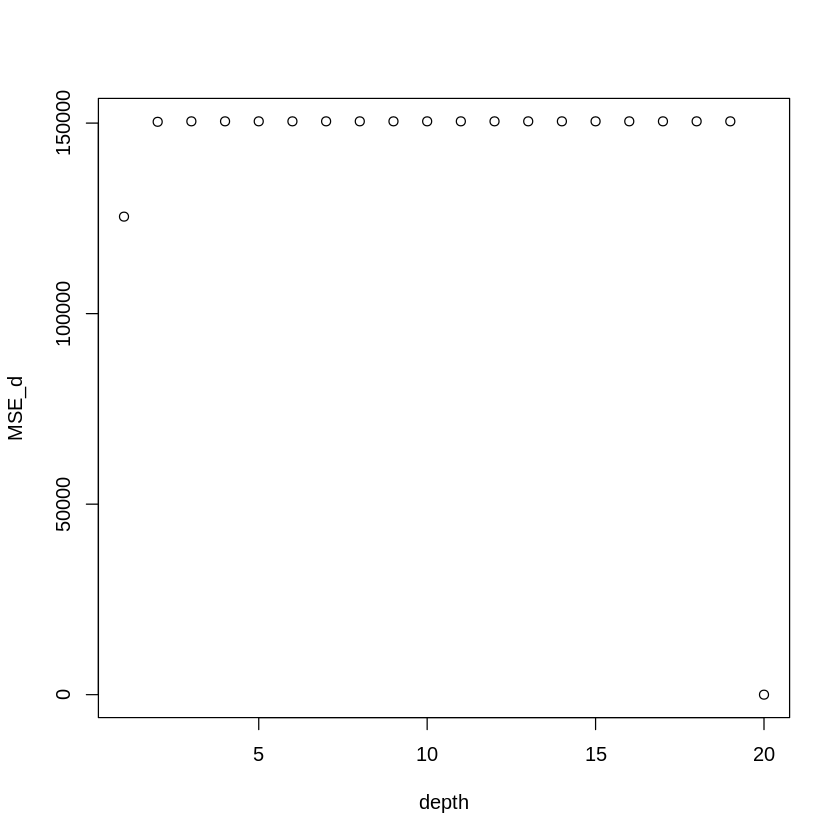

In [ ]:
#Ideally I should  do it with CV. I use my test data set instead
#(I know that this will be a limitation if we have to do a comparison)
depth = seq(1,20)
MSE_d <- rep(0,20)
for (m in depth){
dTree  <- rpart(Salary~.,data_train,maxdepth=m)
y_pred <- predict(dTree,newdata = data_test)
MSE_d[m-1] <- mean((y_pred-data_test$Salary)^2)
}
plot(depth,MSE_d)
which.min(MSE_d)

I can obtain an optimal parameter (min Test MSE). However, I should in theory further to test it on different test data.

null device 
          1

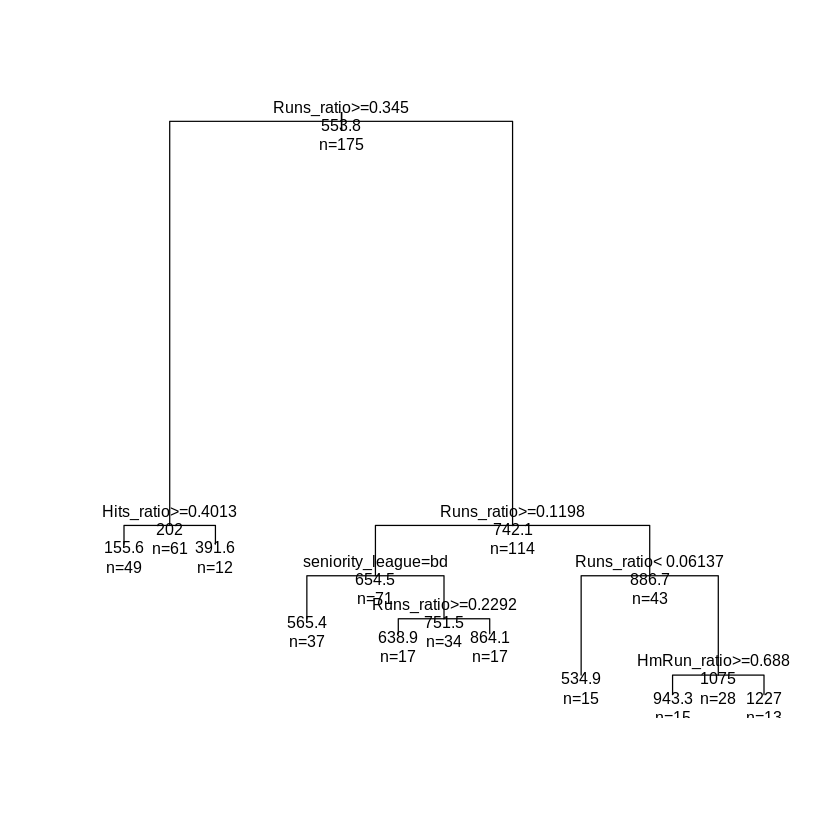

In [ ]:
dTree  <- rpart(Salary~.,data_train,maxdepth=which.min(MSE_d))
plot(dTree)
text(dTree, use.n = TRUE, all = TRUE, cex = 0.8)
dev.off()

In [ ]:
#Again, it seems that the variable that we have created is not very good! overall, it does not get picked much.

## Question 5

You are not convinced that the feature engineering that your boss asked you to do was a good idea.

Try to find evidence that the feature engineering was unnecessary or possibly even detrimental.


**Note**: the answer can be very short! And you can use any data that you have at your disposal (the dataset generated in Q2 and the original one)


In [ ]:
#there are two strategies. Both answers could be good.
#First, run a method that select the variable using the joint dataset with all the variables generated (data + new_data) and show that the "old variables" get selected

dTree2  <- rpart(Salary~.,cbind(data,new_data[,-c(1,2)]),maxdepth=15)
var_imp  <- sort( dTree2$variable.importance/max(dTree2$variable.importance),decreasing=TRUE)
var_imp
#Note! the two most important variables have been removed!

CHits       CRuns  Hits_ratio  Runs_ratio       Years        Hits 
 1.00000000  0.97502299  0.91153740  0.87252201  0.71384039  0.46179935 
       Runs      CHmRun       HmRun HmRun_ratio 
 0.32642920  0.05124649  0.03346436  0.02128270

In [ ]:
#second strategy: I rerun any of the prediction method used so far and I see I can get a better MSE uusing only the old variables!
data_train2 <- data[id_train,]
data_test2 <- data[id_test,]

linear <- lm(Salary ~ ., data=data_train2)
summary(linear)
#compute MSE
y_pred <- predict(linear, data=data_test2)
MSE <- mean((y_pred-data_test2$Salary)^2)
MSE


Call:
lm(formula = Salary ~ ., data = data_train2)

Residuals:
    Min      1Q  Median      3Q     Max 
-729.24 -167.44  -42.71  132.59 1091.35 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  21.8502   100.8797   0.217 0.828789    
Hits          3.9721     1.5933   2.493 0.013646 *  
HmRun        -0.6083     0.2846  -2.138 0.034009 *  
Runs         -2.4088     2.8106  -0.857 0.392668    
Years       -24.0021    14.1417  -1.697 0.091522 .  
CHits        -0.3965     0.3363  -1.179 0.240077    
CHmRun       -0.0231     0.2862  -0.081 0.935774    
CRuns         2.0553     0.5954   3.452 0.000706 ***
LeagueN      23.3670    49.1229   0.476 0.634925    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 306.6 on 166 degrees of freedom
Multiple R-squared:  0.5989,	Adjusted R-squared:  0.5796 
F-statistic: 30.99 on 8 and 166 DF,  p-value: < 2.2e-16


Warning message in y_pred - data_test2$Salary:
“longer object length is not a multiple of shorter object length”


[1] 265789.1

In [ ]:
#We get a worst MSE but at least som of the variables are significant!

## Question 6

Extract from one of the methods previously used what are the two most important variable to predict the salary. Ideally, don't pick them at random but choose the two most important ones. Explain how you did it.

(For the purpose of writing the question I call the two variables, `var1` and `var2`)

 - Now, your boss asks you: *What's the combination of `var1` and `var2` that gives the maximum probability of having a salary larger than $1000?.* I.e. compute

$$\arg \max_{var1,var2} P (\text{salary}>1000| var1,var2)$$

Note: feel free to choose a range and a grid of values for `var1` and `var2`

In [ ]:
#I choose two variables for example the top two in
dTree2  <- rpart(Salary~.,cbind(data,new_data[,-1]),maxdepth=15)
var_imp  <- sort( dTree2$variable.importance/max(dTree2$variable.importance),decreasing=TRUE)
var_imp

CHits            CRuns       Hits_ratio       Runs_ratio 
      1.00000000       0.96924059       0.88853586       0.84796884 
           Years seniority_league             Runs             Hits 
      0.70960694       0.62993466       0.26594305       0.21724016 
           HmRun           CHmRun      HmRun_ratio 
      0.03326589       0.01744440       0.01561151

In [ ]:
# I need to run a logit and obtain a prediction of P(salary|Chits, CRuns)
#Create a binary variable
y <- (data$Salary>1000)*1
dataQ6 <- cbind(y,data %>% select(CHits,CRuns))

In [ ]:
#Run logit
logit  <- glm(y ~ . , data = dataQ6 , family = binomial(logit))
summary(logit)


Call:
glm(formula = y ~ ., family = binomial(logit), data = dataQ6)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.383872   0.413831  -8.177 2.91e-16 ***
CHits       -0.002279   0.001703  -1.338   0.1809    
CRuns        0.007523   0.003239   2.323   0.0202 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 179.69  on 250  degrees of freedom
Residual deviance: 150.41  on 248  degrees of freedom
AIC: 156.41

Number of Fisher Scoring iterations: 5


In [ ]:
CHits_grid <- seq(min(dataQ6$CHits),max(dataQ6$CHits),length.out=10)
CRuns_grid <- seq(min(dataQ6$CRuns),max(dataQ6$CRuns),length.out=10)
X <- expand.grid(CHits_grid,CRuns_grid)
colnames(X)<-c("CHits","CRuns")

In [ ]:
#Now I evaluate max predicted probability
prob<- predict(logit, newdata = X, type = "response")
X[which.max(prob),]

,CHits,CRuns
,<dbl>,<dbl>
91,4,1141
